<a href="https://colab.research.google.com/github/simonaron1111/GA_algoritmusok/blob/main/Simon_%C3%81ron_GA_TSP_projekt_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GA TSP Projekt – SAPI / TSM
Travelling Salesman Problem (TSP) genetikus algoritmussal, valós koordinátákkal, swap + inversion mutációval.

Ez a notebook projekt-sablon, amelyet ki kell töltened. Ahol `TODO` jelölést látsz, ott neked kell megírni a kódot.

## 1. Városok és koordináták (valós adatok)

Feladat:

- Definiálj legalább 15–25 várost valós vagy mesterséges, de reálisnak tűnő koordinátákkal.
- Tárold őket Python-listában vagy más megfelelő szerkezetben.
- Később ebből fogunk távolságmátrixot építeni.

In [3]:
# TODO: definiáld a városokat és koordinátáikat
# https://simplemaps.com/data/world-cities romania orszag elso valahany sora

cities = [
  {"name": "Bucharest", "x":	44.4325, "y": 26.1039},
  {"name": "Cluj-Napoca", "x":	46.7667, "y": 23.5833},
  {"name": "Iasi", "x":	47.1622, "y": 27.5889},
  {"name": "Constanta", "x":	44.1667, "y": 28.6333},
  {"name": "Timisoara", "x":	45.7597, "y": 21.23},
  {"name": "Brasov", "x":	45.6667, "y": 25.6167},
  {"name": "Craiova", "x":	44.3333, "y": 23.8167},
  {"name": "Galati", "x":	45.4233, "y": 28.0425},
  {"name": "Oradea", "x":	47.0722, "y": 21.9211},
  {"name": "Ploiesti", "x":	44.9411, "y": 26.0225},
  {"name": "Braila", "x":	45.2692, "y": 27.9575},
  {"name": "Arad", "x":	46.175, "y": 21.3125},
  {"name": "Pitesti", "x":	44.8606, "y": 24.8678},
  {"name": "Bacau", "x":	46.5833, "y": 26.9167},
  {"name": "Sibiu", "x":	45.7928, "y": 24.1519},
  {"name": "Suceava", "x":	47.6514, "y": 26.2556},
  {"name": "Targu-Mures", "x":	46.5456, "y": 24.5625},
  {"name": "Baia Mare", "x":	47.6567, "y": 23.5719},
  {"name": "Buzau", "x":	45.1531, "y": 26.8208},
  {"name": "Ramnicu Valcea", "x":	45.1047, "y": 24.3756},
  {"name": "Satu Mare", "x":	47.79, "y": 22.89},
  {"name": "Botosani", "x":	47.7486, "y": 26.6694},
  {"name": "Resita", "x":	45.3008, "y": 21.8892},
  {"name": "Drobeta-Turnu Severin", "x":	44.6333, "y":	22.65},
  {"name": "Piatra Neamt", "x":	46.9275, "y": 26.3708},
  {"name": "Bistrita", "x":	47.1333, "y": 24.5},
  {"name": "Targu Jiu", "x":	45.0342, "y": 23.2747},
  {"name": "Targoviste", "x":	44.9244, "y": 25.4572},
]

len(cities), cities[:3]  # ellenőrzésképp

(28,
 [{'name': 'Bucharest', 'x': 44.4325, 'y': 26.1039},
  {'name': 'Cluj-Napoca', 'x': 46.7667, 'y': 23.5833},
  {'name': 'Iasi', 'x': 47.1622, 'y': 27.5889}])

## 2. Távolságfüggvény és távolságmátrix

Feladatok:

- Írj függvényt, amely két város között távolságot számol (pl. euklideszi).
- Írj függvényt, amely a `cities` listából NxN távolságmátrixot épít.

In [8]:
import math

# TODO: távolság két város között
# megprobaltam realisztikusra venni :)
# kilometer
def distance(city_a, city_b):
    """Számold ki a (city_a, city_b) távolságát (pl. euklideszi)."""
    R = 6371.0

    # Convert degrees to radians
    lat1_rad = math.radians(city_a["x"])
    lon1_rad = math.radians(city_a["y"])
    lat2_rad = math.radians(city_b["x"])
    lon2_rad = math.radians(city_b["y"])

    # Differences
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R * c
    return distance


# TODO: távolságmátrix építése
def build_distance_matrix(cities):
    """Adja vissza az NxN-es távolságmátrixot a megadott városlistára."""
    # TODO
    N = len(cities)
    return [[distance(cities[i], cities[j]) for j in range(N)] for i in range(N)]

def get_by_name(name):
    for city in cities:
        if city["name"] == name:
            return city
    return None


dist_matrix = build_distance_matrix(cities)
print(f'{distance(get_by_name("Cluj-Napoca"), get_by_name("Targu-Mures")):.2f}km')
len(dist_matrix), len(dist_matrix[0])  # ellenőrzés

78.67km


(28, 28)

## 3. Tour hossza és fitness függvény

Feladatok:

- Írj függvényt, amely egy permutáció (tour) hosszát számolja ki a távolságmátrix alapján.
- Definiálj fitness függvényt (pl. `-tour_length` vagy `1.0 / tour_length`).

In [9]:
def tour_length(tour, dist_matrix):
    """
    tour: pl. [0, 3, 1, 2, 4] – városindex-permutáció
    dist_matrix: NxN távolságmátrix
    Vissza: körút teljes hossza (visszatérés az első városba is).
    """
    if len(tour) == 0:
      return 0
    distance = 0
    for i in range(len(tour)-1):
      distance += dist_matrix[tour[i]][tour[i+1]]

    return distance + dist_matrix[tour[-1]][tour[0]]


# TODO: fitness függvény
def fitness(tour, dist_matrix):
    """Alakítsd a tour hosszát olyan értékké, amit maximalizálni szeretnénk."""
    # pl. return -tour_length(tour, dist_matrix)
    return -tour_length(tour, dist_matrix)

## 4. Permutációk és kezdeti populáció

Feladatok:

- Írj függvényt, amely véletlen permutációt generál 0..N-1 között.
- Írj függvényt, amely `pop_size` méretű kezdeti populációt hoz létre.

In [10]:
import random
import numpy as np

# TODO: véletlen tour
def random_tour(n_cities):
    """Adj vissza egy véletlen permutációt 0..n_cities-1 között."""
    return np.random.choice(range(n_cities), size=n_cities, replace=False)


# TODO: kezdeti populáció
def init_population(pop_size, n_cities):
    """Populáció: pop_size darab véletlen tour."""
    return [random_tour(n_cities) for i in range(pop_size)]


pop_size = 50  # állítható paraméter
n_cities = len(cities)

population = init_population(pop_size, n_cities)
len(population), population[0]

(50,
 array([ 3, 11, 12, 20, 25,  6,  8, 21, 27, 13,  0, 26, 16, 17, 14, 24, 19,
         2, 23,  5, 18,  1, 15, 22, 10,  7,  4,  9]))

## 5. Mutációs operátorok: swap és inversion

Feladatok:

- Implementálj `swap_mutation` függvényt (két pozíció felcserélése).
- Implementálj `inversion_mutation` függvényt (köztes szakasz megfordítása).

In [11]:
# TODO: swap mutáció
def swap_mutation(tour):
    """Válassz ki két pozíciót és cseréld meg őket egy másolatban."""
    N = len(tour)
    i = random.randint(0, N-1)
    j = random.randint(0, N-1)
    while i == j:
      j = random.randint(0, N-1)
    tour[i], tour[j] = tour[j], tour[i]
    return tour


# TODO: inversion mutáció
def inversion_mutation(tour):
    """Válassz ki két indexet i<j, és fordítsd meg a tour[i:j+1] szakaszt."""
    N = len(tour)
    i = random.randint(1, N-2)
    j = random.randint(i+1, N-1)
    while i >= j:
      i = random.randint(1, N-2)
      j = random.randint(i+1, N-1)
    return np.concatenate((tour[:i], tour[i:j][::-1], tour[j:]))

## 6. Crossover operátor TSP-re (OX vagy PMX)

Feladat:

- Válassz egy TSP-kompatibilis crossover-t (pl. OX vagy PMX).
- Implementáld úgy, hogy az utódok továbbra is érvényes permutációk legyenek.

In [12]:
# TODO: OX vagy PMX crossover implementációja
def crossover(parent1, parent2, method="OX"):
    """TSP kompatibilis crossover. Visszaadhat 1 vagy 2 utódot is."""
    size = len(parent1)
    child = np.full(size, -1)

    start, end = sorted(np.random.choice(range(size), 2, replace=False))

    child[start:end+1] = parent1[start:end+1]

    current_pos = (end + 1) % size

    for i in range(size):
        p2_gene_index = (end + 1 + i) % size
        gene = parent2[p2_gene_index]

        if gene not in child:
            child[current_pos] = gene
            current_pos = (current_pos + 1) % size

    return child


## 7. Szelekciós operátor (rulette / tournament / rang alapú)

Feladat:

- Válassz egy szelekciós módszert (pl. tournament).
- Írj függvényt, amely egy szülőt választ a populációból a fitneszek alapján.

In [15]:
# TODO: szelekció – pl. tournament selection
def select_parent(population, fitness_values, method="tournament", k=3):
    """Válassz ki egy szülőt a population-ből a fitness_values alapján."""
    if method == "tournament":
      selected = np.random.choice(len(population), size=k, replace=False)
      return population[selected[np.argmax(fitness_values[selected])]]
    elif method == "roulette":
      total_fitness = np.sum(fitness_values)
      probabilities = fitness_values / total_fitness
      return population[np.random.choice(len(population), p=probabilities)]
    elif method == "rank":
      sorted_indices = np.argsort(fitness_values)
      rank = np.arange(1, len(population) + 1)
      probabilities = rank / np.sum(rank)
      return population[sorted_indices[np.random.choice(len(population), p=probabilities)]]


## 8. GA fő ciklus, elitizmus, paraméterek

Feladat:

- Írj `run_ga` függvényt, amely:
  - inicializálja a populációt,
  - minden generációban:
    - kiszámítja a fitnesseket,
    - kiválaszt szülőket,
    - alkalmazza a crossover-t,
    - alkalmazza a mutációt (swap / inversion / kevert),
    - opcionálisan elitizmust.
- Visszaadja a legjobb tour-t, a hozzá tartozó hosszt, és a konvergenciagörbéket.

Best tour: [20 17  1 16 25 15 21  2 13 24  5 18  7 10  3  0  9 27 12  6 19 14 26 23
 22  4 11  8], length: -2457.12656098638


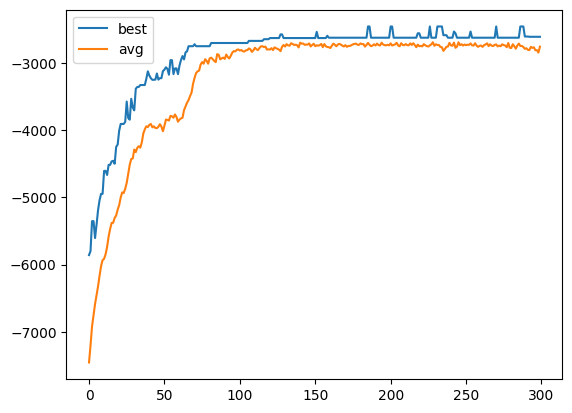

In [28]:
import matplotlib.pyplot as plt


# TODO: GA fő ciklus
def run_ga(
    cities,
    pop_size=100,
    n_generations=300,
    crossover_rate=0.9,
    mutation_rate=0.1,
    mutation_mode="mixed",  # "swap", "inversion", "mixed"
    elitism=1
):
    """Futtasd a GA-t TSP-re, és add vissza a legjobb megoldást és statisztikákat."""
    pop = init_population(pop_size, len(cities))
    dist_matrix = build_distance_matrix(cities)
    history = []
    best_tour = None
    best_fitness = float("-inf")
    for i in range(n_generations):
      fitnesses = np.array([fitness(tour, dist_matrix) for tour in pop])
      bf = np.max(fitnesses)
      bt = pop[np.argmax(fitnesses)]
      if bf > best_fitness:
        best_tour = bt
        best_fitness = bf
      history.append({"best": bf, "avg": np.mean(fitnesses)})
      new_pop = []
      if elitism:
        sorted = np.argsort(fitnesses)
        for j in range(elitism):
          new_pop.append(pop[sorted[j]])
      for _ in range(pop_size - len(new_pop)):
        parent1 = select_parent(pop, fitnesses)
        parent2 = select_parent(pop, fitnesses)
        if np.random.rand() < crossover_rate:
          child1 = crossover(parent1, parent2)
        else:
          child1 = parent1.copy()
        if np.random.rand() < mutation_rate:
          if mutation_mode == "mixed":
            if np.random.rand() < 0.5:
              child1 = swap_mutation(child1)
            else:
              child1 = inversion_mutation(child1)
          elif mutation_mode == "swap":
            child1 = swap_mutation(child1)
          elif mutation_mode == "inversion":
            child1 = inversion_mutation(child1)
        new_pop.append(child1)
      pop = new_pop
    return best_tour, best_fitness, history


# TODO: paraméterezett futtatás (példa)
best_tour, best_length, history = run_ga(cities)
print(f"Best tour: {best_tour}, length: {best_length}")
plt.plot([h["best"] for h in history], label="best")
plt.plot([h["avg"] for h in history], label="avg")
plt.legend()
plt.show()

## 9. Vizualizáció

Feladatok:

- Ábrázold a legjobb tour-t a síkon (városok pontként, élek vonallal kötve).
- Rajzold ki a konvergenciagörbét (generáció vs. legjobb/átlag fitness vagy tour hossz).

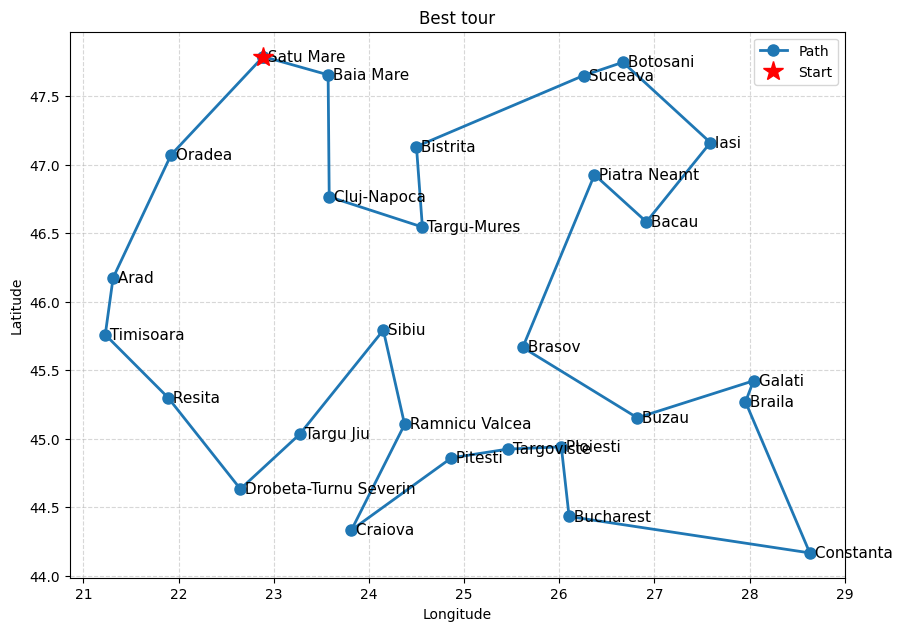

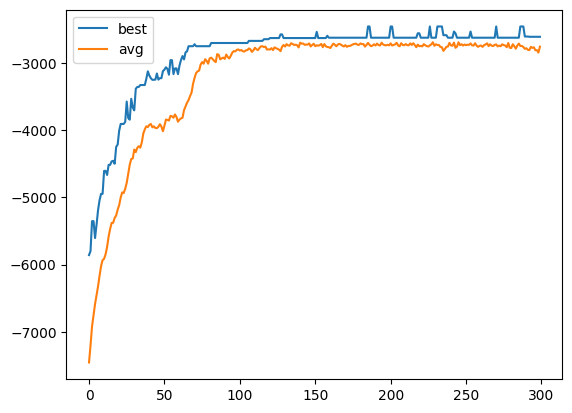

In [29]:
import matplotlib.pyplot as plt

# TODO: rajzold ki a legjobb tour-t
# kellett segitseg AI-tol, hogy a projekcio helyes legyen koordinatakrol a plotra :))
def plot_tour(cities, tour, title="Best tour"):
    tour_with_return = list(tour) + [tour[0]]
    plot_xs = [cities[i]["y"] for i in tour_with_return]
    plot_ys = [cities[i]["x"] for i in tour_with_return]

    plt.figure(figsize=(10, 8))
    plt.plot(plot_xs, plot_ys, 'o-', linewidth=2, markersize=8, label='Path')
    plt.plot(plot_xs[0], plot_ys[0], 'r*', markersize=15, zorder=10, label='Start')

    for i in tour:
        px = cities[i]["y"]
        py = cities[i]["x"]
        label = cities[i].get("name", f"{i}")
        plt.text(px, py, f" {label}", fontsize=11, ha='left', va='center')

    mid_lat = np.mean(plot_ys)
    aspect_ratio = 1.0 / math.cos(math.radians(mid_lat))
    plt.gca().set_aspect(aspect_ratio)

    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()


# TODO: konvergenciagörbe rajzolása
def plot_convergence(history):
    plt.plot([h["best"] for h in history], label="best")
    plt.plot([h["avg"] for h in history], label="avg")
    plt.legend()
    plt.show()

plot_tour(cities, best_tour)
plot_convergence(history)

## 10. Kísérletek és rövid beszámoló

Feladat:

- Hasonlítsd össze legalább három beállítás eredményét:
  - csak swap mutáció
  - csak inversion mutáció
  - kevert swap + inversion
- Minden beállítást futtasd többször (pl. 10 run), és hasonlítsd össze:
  - átlagos legjobb tour hossz
  - konvergencia viselkedés
- Írj rövid szöveges összefoglalót az eredményekről.

SWAP Best tour: [ 5  9 27 12  6 26 23 22  4 11  8 20 17  1 16 25 24 15 21  2 13  7 10  3
 18  0 19 14], length: -2431.277116333092, avg: -2538.8218748282625


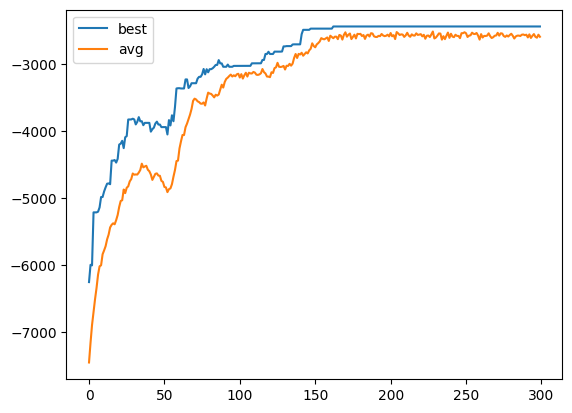

INVERSION Best tour: [ 8 11  4 22 23 26  6 19 12 27  0  3 10  7 18  9  5 14  1 16 24 13  2 21
 15 25 17 20], length: -2449.796271024268, avg: -2494.0323144388353


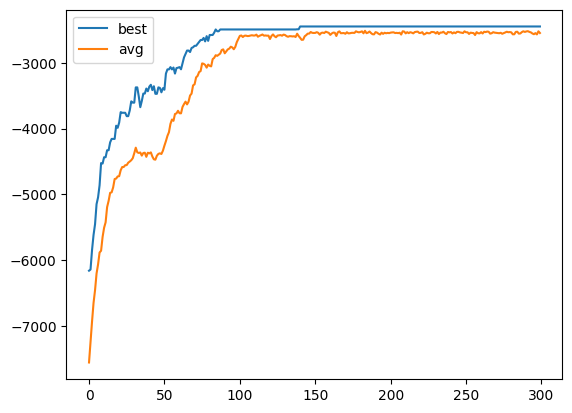

MIXED Best tour: [10  7 13  2 21 15 24 25 16  5 19 14  1 17 20  8 11  4 22 23 26  6 12 27
  0  9 18  3], length: -2440.201170372936, avg: -2502.3717495995784


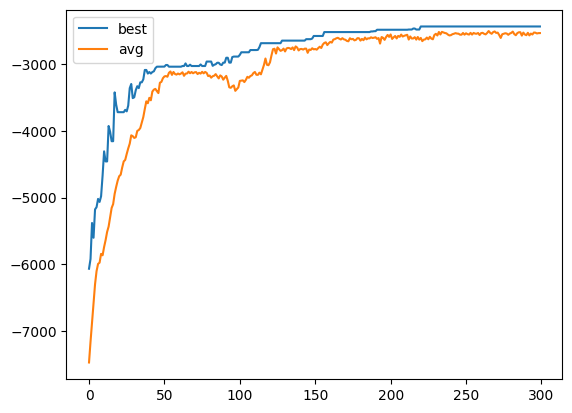

In [31]:
# swap mutacio
avg_best_tour = 0
best_history = None
best_fitness = float("-inf")

for _ in range(10):
  best_tour, best_length, history = run_ga(cities, mutation_mode="swap")
  avg_best_tour += best_length
  if best_length > best_fitness:
    best_history = history
    best_fitness = best_length

avg_best_tour /= 10
print(f"SWAP Best tour: {best_tour}, length: {best_fitness}, avg: {avg_best_tour}")
plot_convergence(best_history)

# inversion mutacio

avg_best_tour = 0
best_history = None
best_fitness = float("-inf")

for _ in range(10):
  best_tour, best_length, history = run_ga(cities, mutation_mode="inversion")
  avg_best_tour += best_length
  if best_length > best_fitness:
    best_history = history
    best_fitness = best_length

avg_best_tour /= 10
print(f"INVERSION Best tour: {best_tour}, length: {best_fitness}, avg: {avg_best_tour}")
plot_convergence(best_history)

# mixed mutacio

avg_best_tour = 0
best_history = None
best_fitness = float("-inf")

for _ in range(10):
  best_tour, best_length, history = run_ga(cities, mutation_mode="mixed")
  avg_best_tour += best_length
  if best_length > best_fitness:
    best_history = history
    best_fitness = best_length

avg_best_tour /= 10
print(f"MIXED Best tour: {best_tour}, length: {best_fitness}, avg: {avg_best_tour}")
plot_convergence(best_history)


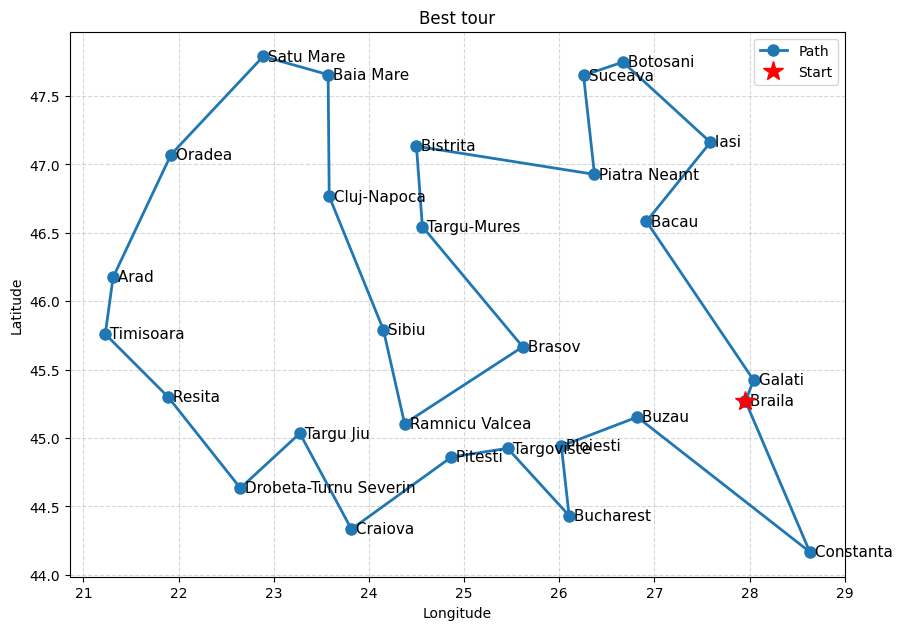

In [32]:
plot_tour(cities, best_tour)

### Rövid elemzés (ide írd a szöveges eredményeket)

- Beállítások:
  - population size: 100
  - generaciok: 300
  - crossover rate: 0.9
  - mutation rate: 0.1
  - elitism: 1

  - n_cities: 28
- Eredmények összefoglalása:
  - a swap mutacio erte el a legjobb eredmenyt, 2431 km
  - viszont neki a legrosszabb az atlag legjobb eredmenye
  - az inverzios mutacionak a legjobb az atlag eredmenye, tehat az a legstabilabb / megbizhatobb
  - a hibrid mutacio egy koztes balance, stabil is es jo eredmeny is
- Következtetések:
  - a swap mutacionak tobb eselye van "veletlenul" egy jo eredmenyre valtani, sok generacio folyaman, viszont ugyanugy rossz eredmenyre is valthat, ami onnantol teljesen elvesztodik az a gen allomany, mint jo megoldas
  - az inverzios mutacio tunik a legjobb megoldasnak, mivel az okosan cserelgeti fel a sorrendeket, es konnyen visszacserelodik ami azelott "el volt rontva"
  - a hibrid megoldas lehet mas beallitasokkal a legjobb megoldas, de az en esetemben nem segitett